<a href="https://colab.research.google.com/github/munsejin/Study2/blob/master/DL001_%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 폐암 수술환자 생존율 예측

In [ ]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import pandas as pd

# 구글 드라이브에서 csv 파일의 위치
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/인공지능강의안/data/ThoraricSurgery.csv',
                   names=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
# seed를 통해 0보다 크거나 같은 임의의 정수를 추출 (동일 seed는 같은 난수가 발생)  
seed = 0
np.random.seed(seed)
# 항상 같은 난수 값을 발생하도록 초기화
tf.set_random_seed(seed)

# 데이터에서 , 제거하고 파일을 읽어서 array로 저장
Data_set = np.loadtxt("/gdrive/My Drive/Colab Notebooks/인공지능강의안/data/ThoraricSurgery.csv", delimiter=",")

# 전체 데이터 행 중에서 0번째부터 17번째 열 값들을 X 리스트에 저장  
X = Data_set[:,0:17]
# 전체 데이터 행 중에서 17번 열 값을 Y 리스트에 저장 
Y = Data_set[:,17]

X

array([[293.  ,   1.  ,   3.8 , ...,   1.  ,   0.  ,  62.  ],
       [  1.  ,   2.  ,   2.88, ...,   1.  ,   0.  ,  60.  ],
       [  8.  ,   2.  ,   3.19, ...,   1.  ,   0.  ,  66.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,   0.  ,  62.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,   0.  ,  58.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,   0.  ,  49.  ]])

In [ ]:
# 신경망을 한층 한층 쌓는 기능 (add() 함수 사용)
model = Sequential()
# Dense() : 신경망 각층의 특성을 설정하는 기능
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile() : 학습 프로세스를 설정하는 기능
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['accuracy'])
# fit() : 학습 데이터로 학습하는 기능
model.fit(X, Y, epochs=30, batch_size=10)

W0712 12:32:57.418115 139948974303104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 12:32:57.611586 139948974303104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0712 12:32:57.686784 139948974303104 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/30
470/470 [==============================] - 1s 1ms/step - loss: 0.6656 - acc: 0.3064
Epoch 2/30
470/470 [==============================] - 0s 106us/step - loss: 0.1488 - acc: 0.8511
Epoch 3/30
470/470 [==============================] - 0s 111us/step - loss: 0.1488 - acc: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 131us/step - loss: 0.1488 - acc: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 111us/step - loss: 0.1488 - acc: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 114us/step - loss: 0.1488 - acc: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 112us/step - loss: 0.1487 - acc: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 109us/step - loss: 0.1487 - acc: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 111us/step - loss: 0.1487 - acc: 0.8511
Epoch 10/30
470/470 [==============================] - 0s 124us/step - loss: 0.1486 - acc: 0.8511
Epoch 11/30
470/470 [==========

In [ ]:
# evaluate() : 출력값과 metrics로 설정한 결과값을 반환
print("\nAccuracy: %.4f" %(model.evaluate(X, Y)[1]))

470/470 [==============================] - 0s 110us/step

Accuracy: 0.8511


## 선형 회귀 복습

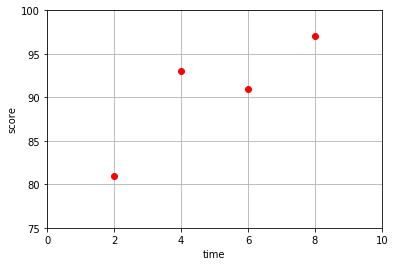

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

x = [2, 4, 6, 8]
y = [81, 93, 91, 97]
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.plot(x, y, 'ro')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(75, 100)
plt.xlim(0, 10)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.show()

In [ ]:
# 최소제곱법 계산
def compute_a(x, mx, y, my):
    d = 0

    for i in range(len(x)):
        d += (x[i] - mx)*(y[i] - my)

    divisor = sum([(i - mx)**2 for i in x])

    a_temp = d / divisor

    return a_temp

In [ ]:
mx = np.mean(x)
my = np.mean(y)

In [ ]:
a = compute_a(x, mx, y, my)
b = my - (mx * a)

y1 = [a * i + b for i in x]

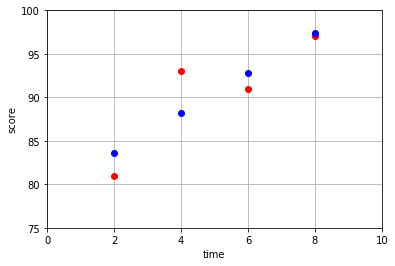

In [ ]:
plt.plot(x, y, 'ro')
plt.plot(x, y1, 'bo')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(75, 100)
plt.xlim(0, 10)
plt.show()

## 제소 제곱근 오차 (MSE)

### a 값에 따른 오차 변화

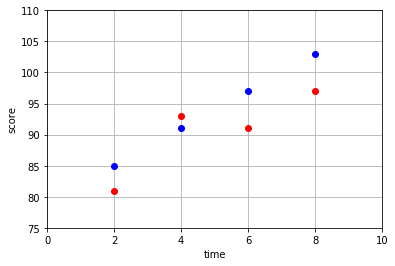

In [ ]:
a = 3.0
b = 79

y1 = [a * i + b for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, y1, 'bo')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(75, 110)
plt.xlim(0, 10)
plt.show()

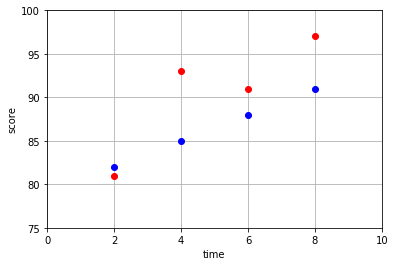

In [ ]:
a = 1.5
b = 79

y1 = [a * i + b for i in x]

plt.plot(x, y, 'ro')
plt.plot(x, y1, 'bo')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(75, 100)
plt.xlim(0, 10)
plt.show()

In [ ]:
# 최소제곱근 오차 계산
def mse(p, y):
  temp = 0
  for i in range(len(y)):
    temp += ((p[i] - y[i]) ** 2)
    
    return np.sqrt(temp / len(y))

In [ ]:
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

mx = np.mean(x)
my = np.mean(y)

a = compute_a(x, mx, y, my)
b = my - (mx * a)

y1 = [a * i + b for i in x]

print("오차값 : ", mse(y1, y))

오차값 :  1.2999999999999972


## 경사하강법

In [ ]:
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

# Tensorflow에서 사용하기 위한 변수 설정
# tf.random_uniform([1]) : 정규분포 난수 1 (1행 1열)개를 생성 (균등분포)
# 기울기 a (0-10사이 실수값)와 절편 b (0-100 사이 실수값)의 값을 임의로 정함
# seed = 0 : 항상 동일한 데이터를 뽑도록 설정
a = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

y1 = a * x + b

# tf.sqrt() : 제곱근 함수
# tf.reduce_mean() : 평균 계산 함수
# tf.square() : 제곱 함수
rmse = tf.sqrt(tf.reduce_mean(tf.square(y1 - y)))

learning_rate = 0.1

# tf.train : 경사 하강 알고리즘을 train 텐서에 연결
# GradientDescentOptimizer() : 미분을 사용하여 최저 비용을 향해 학습률만큼 진행하도록 하는 함수
# minimize(rmse) : rmse가 최소가 되는 값 검색 (최소 비용 함수) – 경사 하강
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse) 

In [ ]:
# tensor (다차원 배열)는 그래프 구조를 통해 노드에서 노드로 이동 (flow) -> 그래프 생성과 실행 단계가 필요
# with tf.Session() as sess : 생성된 그래프를 실행하는 세션을 열여줌
with tf.Session() as sess:
    # tf.global_variables_initializer() : 그래프에 연결된 모든 변수를 초기화 (run() 함수 전에 수행해야 함)
    # sess.run() : 세션을 구동
    sess.run(tf.global_variables_initializer())

    # 1000회 수행
    for step in range(1000):
        # sess.run(gradient_decent) : gradient_decent 노드의 계산을 실행
        sess.run(gradient_decent)

        # sess.run(rmse) : rmse 노드의 계산을 실행
        # sess.run(a) : a 노드의 계산을 실행
        # sess.run(b) : b 노드의 계산을 실행
        if(step % 100 == 0):
            print("Epoch:%.f, RMSE = %.04f, 기울기 a = %.4f, y 절편 b = %.4f " %(step, sess.run(rmse), sess.run(a), sess.run(b)))

Epoch:0, RMSE = 64.2341, 기울기 a = 2.0853, y 절편 b = 15.9056 
Epoch:100, RMSE = 23.7391, 기울기 a = 11.9713, y 절편 b = 21.2854 
Epoch:200, RMSE = 22.1433, 기울기 a = 11.3112, y 절편 b = 25.2252 
Epoch:300, RMSE = 20.5515, 기울기 a = 10.6518, y 절편 b = 29.1601 
Epoch:400, RMSE = 18.9646, 기울기 a = 9.9934, y 절편 b = 33.0889 
Epoch:500, RMSE = 17.3840, 기울기 a = 9.3364, y 절편 b = 37.0099 
Epoch:600, RMSE = 15.8116, 기울기 a = 8.6810, y 절편 b = 40.9208 
Epoch:700, RMSE = 14.2499, 기울기 a = 8.0279, y 절편 b = 44.8183 
Epoch:800, RMSE = 12.7029, 기울기 a = 7.3779, y 절편 b = 48.6975 
Epoch:900, RMSE = 11.1762, 기울기 a = 6.7321, y 절편 b = 52.5511 


## 다중 회귀

In [ ]:
x1 = [2, 4, 6, 8]
x2 = [0, 4, 2, 3]
y = [81, 93, 91, 97]

a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype=tf.float64, seed=0))

y1 = a1 * x1 + a2 * x2 + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y1 - y)))

learning_rate = 0.1

gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse) 

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(1000):
        sess.run(gradient_decent)

        if(step % 100 == 0):
           print("Epoch:%.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f y 절편 b = %.4f" %(step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))

Epoch:0, RMSE = 60.1285, 기울기 a1 = 2.0818, 기울기 a2 = 1.8078 y 절편 b = 15.9057
Epoch:100, RMSE = 22.9252, 기울기 a1 = 9.7380, 기울기 a2 = 5.2504 y 절편 b = 20.9709
Epoch:200, RMSE = 21.3389, 기울기 a1 = 9.1863, 기울기 a2 = 5.0048 y 절편 b = 24.9077
Epoch:300, RMSE = 19.7529, 기울기 a1 = 8.6253, 기울기 a2 = 4.7796 y 절편 b = 28.8441
Epoch:400, RMSE = 18.1669, 기울기 a1 = 8.0588, 기울기 a2 = 4.5668 y 절편 b = 32.7802
Epoch:500, RMSE = 16.5810, 기울기 a1 = 7.4890, 기울기 a2 = 4.3611 y 절편 b = 36.7162
Epoch:600, RMSE = 14.9952, 기울기 a1 = 6.9175, 기울기 a2 = 4.1594 y 절편 b = 40.6521
Epoch:700, RMSE = 13.4095, 기울기 a1 = 6.3451, 기울기 a2 = 3.9598 y 절편 b = 44.5877
Epoch:800, RMSE = 11.8240, 기울기 a1 = 5.7722, 기울기 a2 = 3.7612 y 절편 b = 48.5232
Epoch:900, RMSE = 10.2387, 기울기 a1 = 5.1992, 기울기 a2 = 3.5631 y 절편 b = 52.4583


## (실습) learning rate를 변경하면서 RMSE 변경 확인

## 로지스틱 회귀

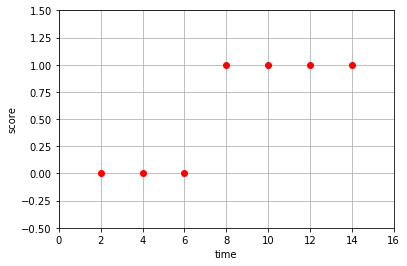

In [ ]:
x = [2, 4, 6, 8, 10, 12, 14]
y = [0, 0, 0, 1, 1, 1, 1]

plt.plot(x, y, 'ro')
plt.xlabel("time")
plt.ylabel("score")
plt.grid(True)
plt.ylim(-0.5, 1.5)
plt.xlim(0, 16)
plt.show()

### 시그모이드 함수

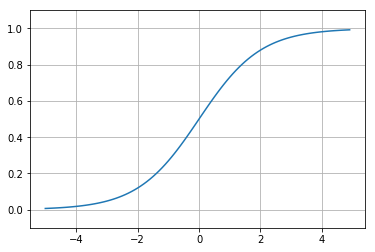

In [ ]:
def sigmoid(a, x, b):
    return 1 / (1 + np.exp(-a * x + b))

a = 1
x = np.arange(-5.0, 5.0, 0.1)
b = 0
y = sigmoid(a, x, b)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

## (실습) a, b 값을 변경하면서 변화를 확인

In [ ]:
x = [2, 4, 6, 8, 10, 12, 14]
y = [0, 0, 0, 1, 1, 1, 1]

a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

h = 1 / (1 + np.e**(-a * x + b))

loss = -tf.reduce_mean(np.array(y) * tf.log(h) + (1 - np.array(y)) * tf.log(1 - h))

learning_rate = 0.5
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        sess.run(gradient_decent)
        if(step % 100 == 0):
            print("Epoch:%.f, loss = %.04f, 기울기 a = %.4f, y 절편 b = %.4f"
                   %(step, sess.run(loss), sess.run(a), sess.run(b)))



W0712 13:39:06.430628 139948974303104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch:0, loss = 4.2261, 기울기 a = 2.3616, y 절편 b = -0.4124
Epoch:100, loss = 0.1978, 기울기 a = 0.6316, y 절편 b = 5.0417
Epoch:200, loss = 0.1145, 기울기 a = 0.9502, y 절편 b = 6.3934
Epoch:300, loss = 0.0983, 기울기 a = 1.0752, y 절편 b = 7.2832
Epoch:400, loss = 0.0873, 기울기 a = 1.1781, y 절편 b = 8.0197
Epoch:500, loss = 0.0790, 기울기 a = 1.2673, y 절편 b = 8.6562
Epoch:600, loss = 0.0725, 기울기 a = 1.3467, y 절편 b = 9.2213
Epoch:700, loss = 0.0672, 기울기 a = 1.4188, y 절편 b = 9.7322
Epoch:800, loss = 0.0627, 기울기 a = 1.4848, y 절편 b = 10.2004
Epoch:900, loss = 0.0589, 기울기 a = 1.5461, y 절편 b = 10.6337


### 학습을 7시간 한 경우 합격여부는 ?

In [ ]:
x = [2, 4, 6, 8, 10, 12, 14]
y = [0, 0, 0, 1, 1, 1, 1]

a = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64, seed=0))

h = 1 / (1 + np.e**(-a * x + b))

loss = -tf.reduce_mean(np.array(y) * tf.log(h) + (1 - np.array(y)) * tf.log(1 - h))

learning_rate = 0.5
gradient_decent = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(1000):
        sess.run(gradient_decent)
        
        if(step % 100 == 0):
            result_a = sess.run(a)
            result_b = sess.run(b)
            print("Epoch:%.f, loss = %.04f, 기울기 a = %.4f, y 절편 b = %.4f"
                   %(step, sess.run(loss), result_a, result_b))

h = 1 / (1 + np.e**(-result_a * 7 + result_b))
print(h)

Epoch:0, loss = 4.2261, 기울기 a = 2.3616, y 절편 b = -0.4124
Epoch:100, loss = 0.1978, 기울기 a = 0.6316, y 절편 b = 5.0417
Epoch:200, loss = 0.1145, 기울기 a = 0.9502, y 절편 b = 6.3934
Epoch:300, loss = 0.0983, 기울기 a = 1.0752, y 절편 b = 7.2832
Epoch:400, loss = 0.0873, 기울기 a = 1.1781, y 절편 b = 8.0197
Epoch:500, loss = 0.0790, 기울기 a = 1.2673, y 절편 b = 8.6562
Epoch:600, loss = 0.0725, 기울기 a = 1.3467, y 절편 b = 9.2213
Epoch:700, loss = 0.0672, 기울기 a = 1.4188, y 절편 b = 9.7322
Epoch:800, loss = 0.0627, 기울기 a = 1.4848, y 절편 b = 10.2004
Epoch:900, loss = 0.0589, 기울기 a = 1.5461, y 절편 b = 10.6337
[0.54707706]
